In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

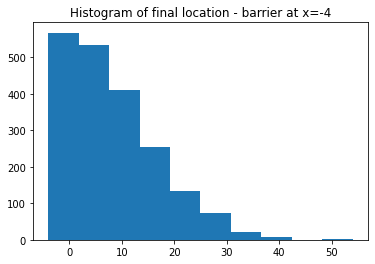

In [8]:
#1D walks
def unbiased_random_walk(start, length):
    position = start

    for i in range(length):
        #barrier at x = -4
        if position == -4:
            position += 1
        elif random.random() < 0.5:
            position += 1
        else:
            position -= 1 
    return position

final_pos = []

for i in range(2000):
    final_pos.append(unbiased_random_walk(0, 200))

plt.figure()
plt.title('Histogram of final location - barrier at x=-4')
plt.hist(final_pos)
plt.show()

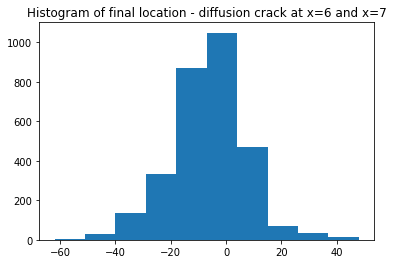

In [9]:
def random_walk_diffusion(start, length):
    position = start
    for i in range(length):
        if position == 6 or position == 7:
            if random.random() < 0.75:
                position -= 1
            else:
                position += 1
        elif random.random() < 0.5:
            position += 1
        else:
            position -= 1 
    return position



final_pos = []

for i in range(3000):
    final_pos.append(random_walk_diffusion(0, 300))

plt.figure()
plt.title('Histogram of final location - diffusion crack at x=6 and x=7')
plt.hist(final_pos)
plt.show()

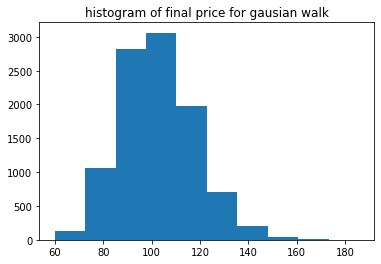

In [6]:
def gaus_random_walk(length):
    mu = 0.1
    sigma = 0.3
    dt = 1/365
    price = 100
    for i in range(length):
        price += price * (mu*dt + sigma * np.random.normal(0, np.sqrt(dt)))
    return price

final_price = []

for i in range(10000):
    final_price.append(gaus_random_walk(90))

plt.figure()
plt.title('histogram of final price for gausian walk')
plt.hist(final_price)
plt.show()

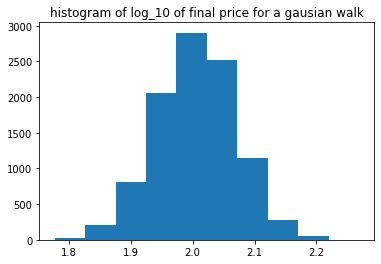

In [7]:
plt.figure()
plt.title('histogram of log_10 of final price for a gausian walk')
plt.hist(np.log10(final_price))
plt.show()

In [16]:
def plane_walk(length):

    pos = [0,0]
    
    for i in range(length):
        if random.random() < 0.5:
            pos[0] += 1
        else:
            pos[0] -=1
            
        if random.random() < 0.5:
            pos[1] += 1
        else:
            pos[1] -=1
            
        if abs(pos[0]) > 19 or abs(pos[1]) > 19:
            return 0
        elif pos[0] == 13 or pos[0] == 14:
            if pos[1] == 7 or pos[1] == 8:
                return -1
            
    return pos

hole = 0
boud = 0
end =[]

for i in range(1000):
    r = plane_walk(120)
    
    if r == 0:
        boud +=1
    elif r == -1:
        hole +=1
    else:
        end.append(r)

In [17]:
print('number of paths fallen in hole:')
print(hole/(hole+boud + len(end)))
print()
print('number of paths ending at bound:')
print(boud/(hole+boud + len(end)))

number of paths fallen in hole:
0.047

number of paths ending at bound:
0.258


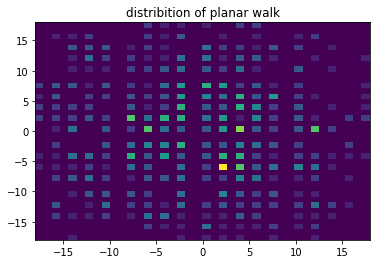

In [20]:
plt.figure()
plt.title('distribition of planar walk')
plt.hist2d([i[0] for i in end],[i[1] for i in end], bins=(40, 40))
plt.show()